In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [5]:
print("this is the the GlobalTemperatures file")
df1 = pd.read_csv('globaltemp/GlobalTemperatures.csv', delimiter=',')
df1.dataframeName = 'GlobalLandTemperaturesByCity.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

this is the the GlobalTemperatures file
There are 3192 rows and 9 columns


In [6]:
df1

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0     1750-01-01                   3.034                              3.574   
1     1750-02-01                   3.083                              3.702   
2     1750-03-01                   5.626                              3.076   
3     1750-04-01                   8.490                              2.451   
4     1750-05-01                  11.573                              2.072   
...          ...                     ...                                ...   
3187  2015-08-01                  14.755                              0.072   
3188  2015-09-01                  12.999                              0.079   
3189  2015-10-01                  10.801                              0.102   
3190  2015-11-01                   7.433                              0.119   
3191  2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                    NaN                            NaN                 NaN   
1                    NaN                            NaN                 NaN   
2                    NaN                            NaN                 NaN   
3                    NaN                            NaN                 NaN   
4                    NaN                            NaN                 NaN   
...                  ...                            ...                 ...   
3187              20.699                          0.110               9.005   
3188              18.845                          0.088               7.199   
3189              16.450                          0.059               5.232   
3190              12.892                          0.093               2.157   
3191              10.725                          0.154               0.287   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                               NaN                             NaN   
1                               NaN                             NaN   
2                               NaN                             NaN   
3                               NaN                             NaN   
4                               NaN                             NaN   
...                             ...                             ...   
3187                          0.170                          17.589   
3188                          0.229                          17.049   
3189                          0.115                          16.290   
3190                          0.106                          15.252   
3191                          0.099                          14.774   

      LandAndOceanAverageTemperatureUncertainty  
0                                           NaN  
1                                           NaN  
2                                           NaN  
3                                           NaN  
4                                           NaN  
...                                         ...  
3187                                      0.057  
3188                                      0.058  
3189                                      0.062  
3190                                      0.063  
3191                                      0.062  

[3192 rows x 9 columns]

**Null imputation:**

We will check the null rates and explain the nulls.
After that consider ways to impute them


In [7]:
null_rate = df1['LandAverageTemperatureUncertainty'].isnull().sum()

# Calculate the null rate as a percentage of the total number of rows
total_rows = len(df1)
null_rate_percentage = (null_rate / total_rows) * 100

print(f"Null rate for 'LandAverageTemperature': {null_rate} rows ({null_rate_percentage:.2f}%)")

Null rate for 'LandAverageTemperature': 12 rows (0.38%)


In [8]:
null_rate = df1['LandAverageTemperature'].isnull().sum()

# Calculate the null rate as a percentage of the total number of rows
total_rows = len(df1)
null_rate_percentage = (null_rate / total_rows) * 100

print(f"Null rate for 'LandAverageTemperature': {null_rate} rows ({null_rate_percentage:.2f}%)")

Null rate for 'LandAverageTemperature': 12 rows (0.38%)


LandAverageTemperatureUncertainty and LandAverageTemperature matches
Since it's only 12 rows, we decided to drop them

In [9]:

df1.dropna(subset=['LandAverageTemperature'], inplace=True)
len(df1)

3180

In [10]:
null_rate = df1['LandMaxTemperature'].isnull().sum()

# Calculate the null rate as a percentage of the total number of rows
total_rows = len(df1)
null_rate_percentage = (null_rate / total_rows) * 100

print(f"Null rate for 'LandMaxTemperature': {null_rate} rows ({null_rate_percentage:.2f}%)")

Null rate for 'LandMaxTemperature': 1188 rows (37.36%)


Since it's really high, we want to impute it.Let's the rows with nulls first


In [11]:
null_rows = df1[df1['LandMaxTemperature'].isnull()]
null_rows.describe()

LandAverageTemperature  LandAverageTemperatureUncertainty  \
count             1188.000000                        1188.000000   
mean                 8.044657                           2.048162   
std                  4.555287                           1.080738   
min                 -2.080000                           0.428000   
25%                  4.038000                           1.269000   
50%                  8.084000                           1.800500   
75%                 12.311750                           2.591250   
max                 19.021000                           7.880000   

       LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
count                 0.0                            0.0                 0.0   
mean                  NaN                            NaN                 NaN   
std                   NaN                            NaN                 NaN   
min                   NaN                            NaN                 NaN   
25%                   NaN                            NaN                 NaN   
50%                   NaN                            NaN                 NaN   
75%                   NaN                            NaN                 NaN   
max                   NaN                            NaN                 NaN   

       LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
count                            0.0                             0.0   
mean                             NaN                             NaN   
std                              NaN                             NaN   
min                              NaN                             NaN   
25%                              NaN                             NaN   
50%                              NaN                             NaN   
75%                              NaN                             NaN   
max                              NaN                             NaN   

       LandAndOceanAverageTemperatureUncertainty  
count                                        0.0  
mean                                         NaN  
std                                          NaN  
min                                          NaN  
25%                                          NaN  
50%                                          NaN  
75%                                          NaN  
max                                          NaN

In [12]:
LandAverageTemperature = df1[['LandAverageTemperature', "LandAverageTemperatureUncertainty", "dt"]]
LandAverageTemperature #this is for the use of LandAverageTemperature

LandAverageTemperature  LandAverageTemperatureUncertainty          dt
0                      3.034                              3.574  1750-01-01
1                      3.083                              3.702  1750-02-01
2                      5.626                              3.076  1750-03-01
3                      8.490                              2.451  1750-04-01
4                     11.573                              2.072  1750-05-01
...                      ...                                ...         ...
3187                  14.755                              0.072  2015-08-01
3188                  12.999                              0.079  2015-09-01
3189                  10.801                              0.102  2015-10-01
3190                   7.433                              0.119  2015-11-01
3191                   5.518                              0.100  2015-12-01

[3180 rows x 3 columns]

In [13]:
df1.dropna(subset=['LandMaxTemperature'], inplace=True)
len(df1)

1992

In [14]:

is_null_free = not df1.isnull().any().any()

if is_null_free:
    print("The DataFrame df1 is null-free.")
else:
    print("The DataFrame df1 contains null values.")


The DataFrame df1 is null-free.


df1: null free data frame contains all columns

LandAverageTemperature: null free data frame contains information about 
LandAverageTemperature

**Now let's start visualize it**


In [15]:
#all imports
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Basic statistics for 'LandAverageTemperature' and 'LandAverageTemperatureUncertainty'
temperature_stats = LandAverageTemperature['LandAverageTemperature'].describe()
uncertainty_stats = LandAverageTemperature['LandAverageTemperatureUncertainty'].describe()

print("Temperature Statistics:\n", temperature_stats)
print("\nUncertainty Statistics:\n", uncertainty_stats)


the mean of LandAverageTemperature is 8.374731132075471


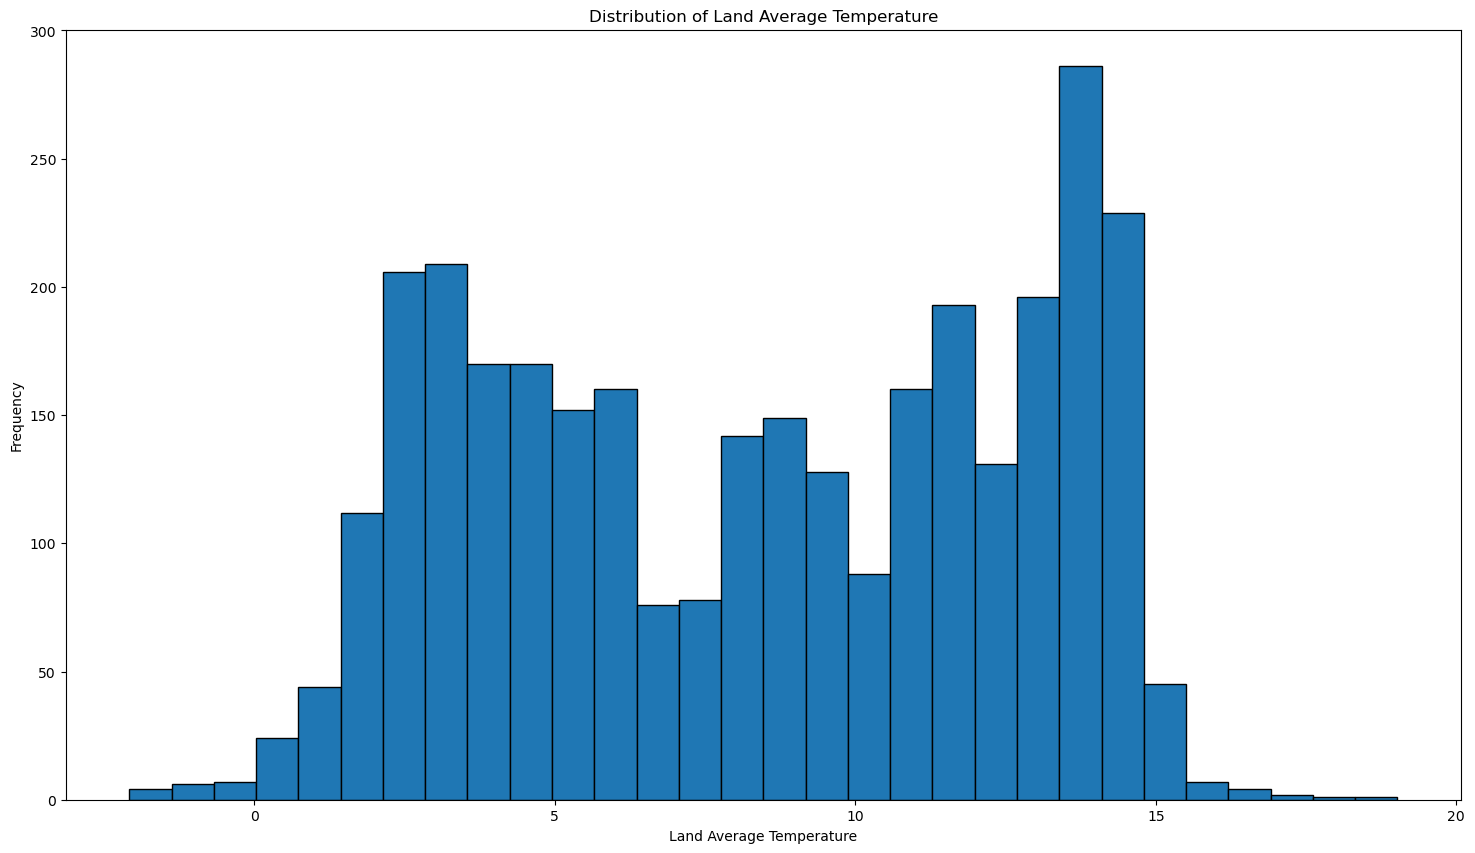

In [16]:
plt.figure(figsize=(18, 10))  # Optional: Adjust the figure size

# Create a histogram of the 'LandAverageTemperature' column
plt.hist(LandAverageTemperature['LandAverageTemperature'], bins=30, edgecolor='k')

# Add labels and a title
plt.xlabel('Land Average Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Land Average Temperature')
print("the mean of LandAverageTemperature is", LandAverageTemperature['LandAverageTemperature'].mean())
# Show the plot
plt.show()

the mean of LandAverageTemperatureUncertainty is 0.938467924528302


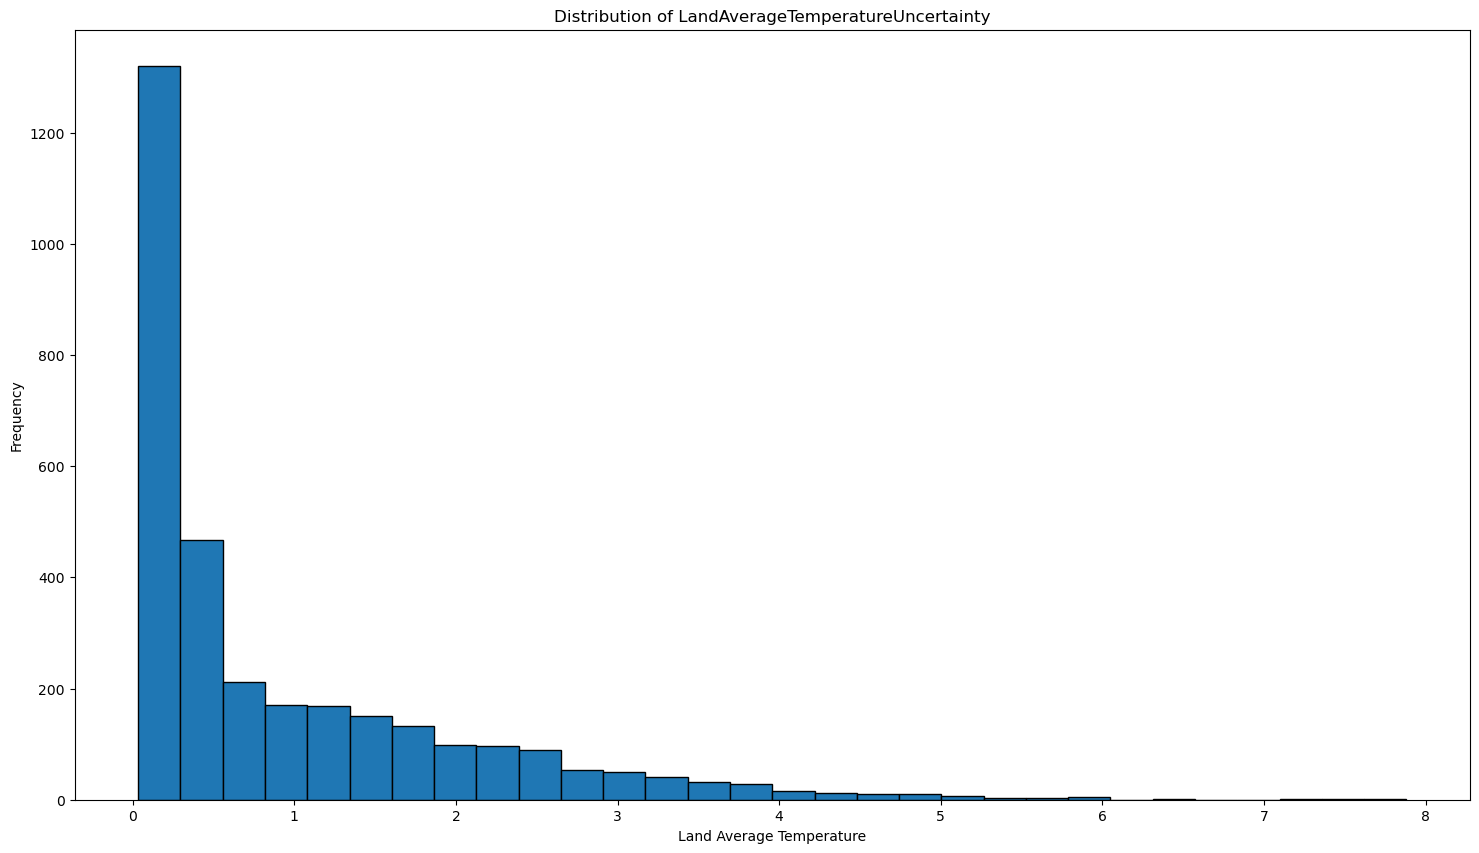

In [17]:
plt.figure(figsize=(18, 10))  # Optional: Adjust the figure size

# Create a histogram of the 'LandAverageTemperature' column
plt.hist(LandAverageTemperature['LandAverageTemperatureUncertainty'], bins=30, edgecolor='k')

# Add labels and a title
plt.xlabel('Land Average Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of LandAverageTemperatureUncertainty')
print("the mean of LandAverageTemperatureUncertainty is", LandAverageTemperature['LandAverageTemperatureUncertainty'].mean())
# Show the plot
plt.show()

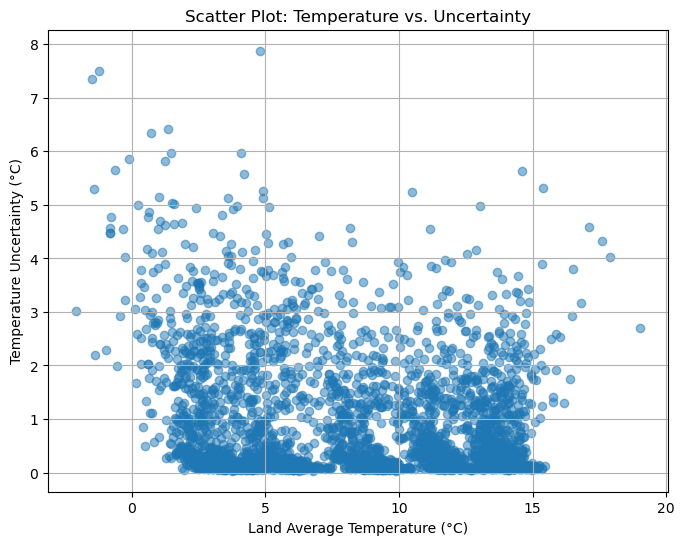

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(LandAverageTemperature['LandAverageTemperature'], LandAverageTemperature['LandAverageTemperatureUncertainty'], alpha=0.5)
plt.xlabel('Land Average Temperature (°C)')
plt.ylabel('Temperature Uncertainty (°C)')
plt.title('Scatter Plot: Temperature vs. Uncertainty')
plt.grid(True)
plt.show()


C:\Users\ronal\AppData\Local\Temp\ipykernel_15760\895987479.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LandAverageTemperature.loc[:, 'Date'] = pd.to_datetime(LandAverageTemperature['dt'])


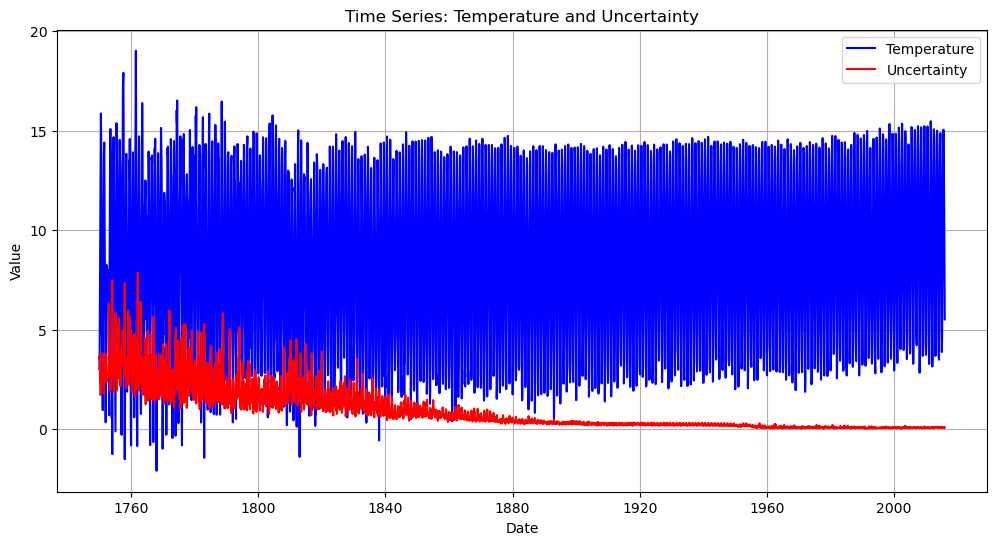

In [19]:
# Assuming you have a date or timestamp column 'Date'
LandAverageTemperature.loc[:, 'Date'] = pd.to_datetime(LandAverageTemperature['dt'])

plt.figure(figsize=(12, 6))
plt.plot(LandAverageTemperature['Date'], LandAverageTemperature['LandAverageTemperature'], label='Temperature', color='blue',linestyle='-')
plt.plot(LandAverageTemperature['Date'], LandAverageTemperature['LandAverageTemperatureUncertainty'], label='Uncertainty', color='red',linestyle='-')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series: Temperature and Uncertainty')
plt.legend()
plt.grid(True)
plt.show()



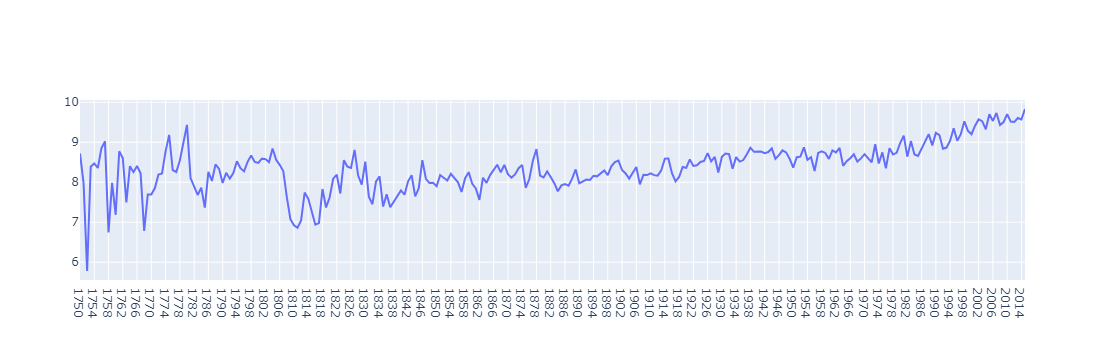

In [20]:

import plotly.graph_objs as go
import plotly.offline as py


LandAverageTemperature.loc[:,'dt'] = pd.to_datetime(LandAverageTemperature['dt']).dt.strftime('%d/%m/%Y')
LandAverageTemperature.loc[:,'dt'] = LandAverageTemperature['dt'].apply(lambda x: x[6:])
global1 = LandAverageTemperature.groupby(['dt'])['LandAverageTemperature'].mean().reset_index()

# Create a Plotly line plot
trace = go.Scatter(
    x=global1['dt'],
    y=global1['LandAverageTemperature'],
    mode='lines',
)

data = [trace]

# Plot the data
py.iplot(data, filename='line-mode')


Analysis on possible reasons:

Inverse Relationship: The fact that uncertainty is decreasing while temperature is increasing suggests an inverse relationship between temperature and uncertainty. This means that as global land temperatures rise, the uncertainty around those temperature measurements is decreasing.(**unlikely by common sense**)


**Improved Measurement Techniques**: The decreasing uncertainty could indicate advancements in temperature measurement techniques, data collection, or data processing. It may reflect increased accuracy and confidence in temperature measurements.


**Climate Change**: As we progress in time, our ability to measure and predict temperature changes due to climate change has improved. Additionally, **global warming** could causes the temperature to goes up

In [21]:
df1.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
1200  1850-01-01                   0.749                              1.105   
1201  1850-02-01                   3.071                              1.275   
1202  1850-03-01                   4.954                              0.955   
1203  1850-04-01                   7.217                              0.665   
1204  1850-05-01                  10.004                              0.617   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
1200               8.242                          1.738              -3.206   
1201               9.970                          3.007              -2.291   
1202              10.347                          2.401              -1.905   
1203              12.934                          1.004               1.018   
1204              15.655                          2.406               3.811   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
1200                          2.822                          12.833   
1201                          1.623                          13.588   
1202                          1.410                          14.043   
1203                          1.329                          14.667   
1204                          1.347                          15.507   

      LandAndOceanAverageTemperatureUncertainty  
1200                                      0.367  
1201                                      0.414  
1202                                      0.341  
1203                                      0.267  
1204                                      0.249

In [22]:
LandMaxTemperature_stats = df1['LandAverageTemperature'].describe()
LandMaxTemperatureUncertainty_stats = df1['LandAverageTemperatureUncertainty'].describe()

print("LandMaxTemperature Statistics:\n", LandMaxTemperature_stats)
print("\nLandMaxemperatureUncertainty Statistics:\n", LandMaxTemperatureUncertainty_stats)

LandMaxTemperature Statistics:
 count    1992.000000
mean        8.571583
std         4.263193
min         0.404000
25%         4.430000
50%         8.850500
75%        12.858500
max        15.482000
Name: LandAverageTemperature, dtype: float64

LandMaxemperatureUncertainty Statistics:
 count    1992.000000
mean        0.276663
std         0.224030
min         0.034000
25%         0.099750
50%         0.230000
75%         0.347250
max         1.492000
Name: LandAverageTemperatureUncertainty, dtype: float64


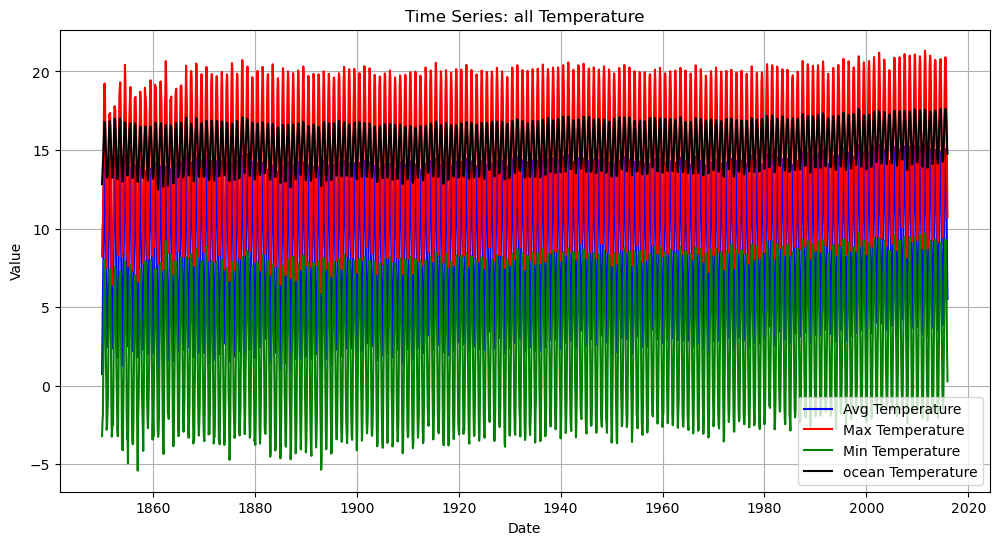

In [23]:
df1.loc[:, 'Date'] = pd.to_datetime(df1['dt'])

plt.figure(figsize=(12, 6))
plt.plot(df1['Date'], df1['LandAverageTemperature'], label='Avg Temperature', color='blue')
plt.plot(df1['Date'], df1['LandMaxTemperature'], label='Max Temperature', color='red')
plt.plot(df1['Date'], df1['LandMinTemperature'], label='Min Temperature', color='green')
plt.plot(df1['Date'], df1['LandAndOceanAverageTemperature'], label='ocean Temperature', color='black')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series: all Temperature')
plt.legend()
plt.grid(True)
plt.show()


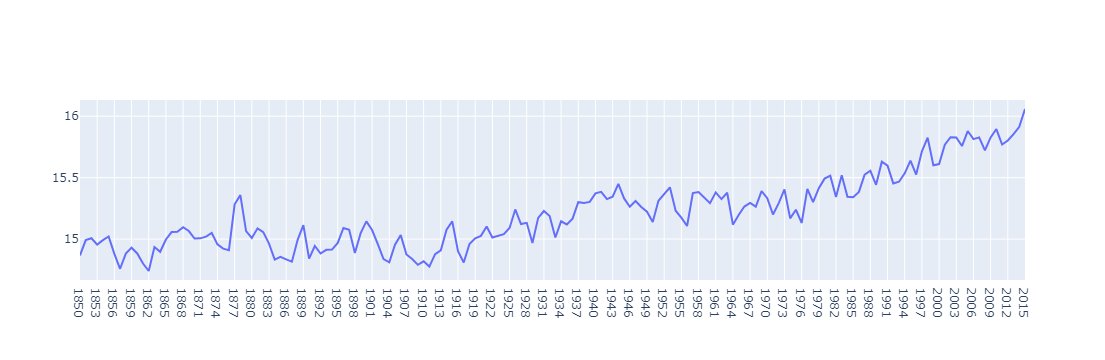

In [24]:
df1.loc[:,'dt'] = pd.to_datetime(df1['dt']).dt.strftime('%d/%m/%Y')
df1.loc[:,'dt'] = df1['dt'].apply(lambda x: x[6:])
global1 = df1.groupby(['dt'])['LandAndOceanAverageTemperature'].mean().reset_index()

# Create a Plotly line plot
trace = go.Scatter(
    x=global1['dt'],
    y=global1['LandAndOceanAverageTemperature'],
    mode='lines',
)

data = [trace]

# Plot the data
py.iplot(data, filename='line-mode')

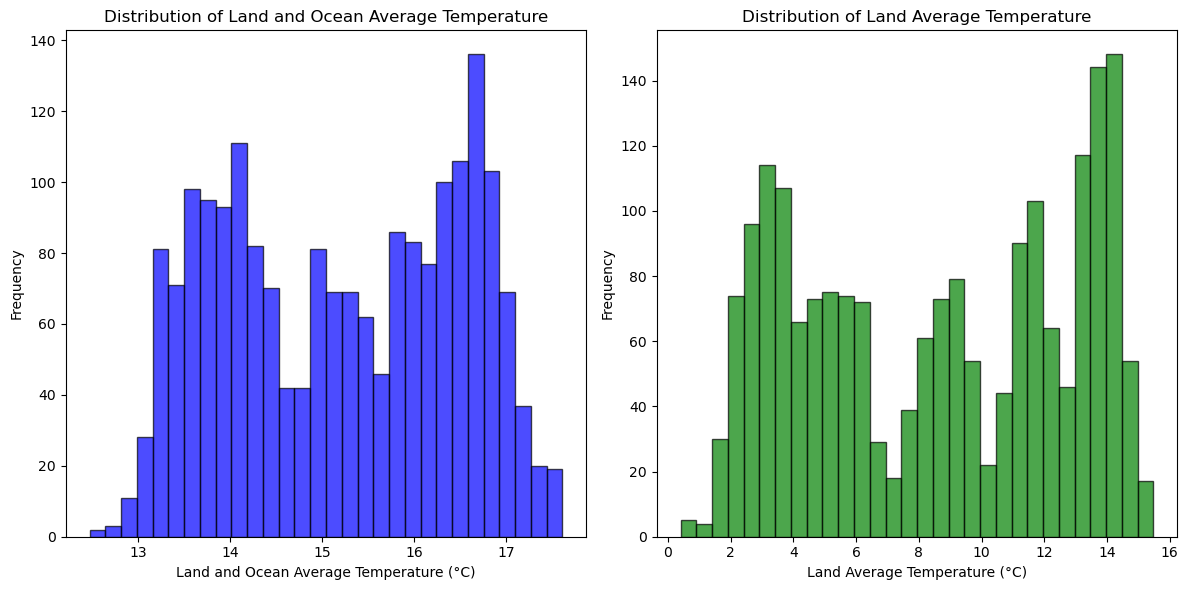

In [25]:

plt.figure(figsize=(12, 6))

# Plot the distribution of 'LandAndOceanAverageTemperature'
plt.subplot(1, 2, 1)
plt.hist(df1['LandAndOceanAverageTemperature'].dropna(), bins=30, edgecolor='k', alpha=0.7, color='blue')
plt.xlabel('Land and Ocean Average Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Land and Ocean Average Temperature')

# Plot the distribution of 'LandAverageTemperature'
plt.subplot(1, 2, 2)
plt.hist(df1['LandAverageTemperature'].dropna(), bins=30, edgecolor='k', alpha=0.7, color='green')
plt.xlabel('Land Average Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Land Average Temperature')

plt.tight_layout()
plt.show()


In [26]:
land_avg_temp = df1['LandAverageTemperature'].mean()
land_ocean_avg_temp = df1['LandAndOceanAverageTemperature'].mean()

print(f"Mean Land Average Temperature: {land_avg_temp:.2f} °C")
print(f"Mean Land and Ocean Average Temperature: {land_ocean_avg_temp:.2f} °C")


Mean Land Average Temperature: 8.57 °C
Mean Land and Ocean Average Temperature: 15.21 °C


Further investigation is needed to explore the geographic differences and potential explanations. Utilizing additional datasets in the form of CSV files could provide valuable insights.

Moreover, it's worth noting that the increasing trend appears to be more pronounced in the **land-ocean temperature data**.